## Project - Titanic EDA

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv(r"D:\Study\Courses\MS\titanic.csv")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
df.shape

(891, 12)

In [6]:
# Null Percentage for very Feature
round(df.isna().sum()*100/df.shape[0],2)

PassengerId     0.00
Survived        0.00
Pclass          0.00
Name            0.00
Sex             0.00
Age            19.87
SibSp           0.00
Parch           0.00
Ticket          0.00
Fare            0.00
Cabin          77.10
Embarked        0.22
dtype: float64

In [7]:
df['Survived'].value_counts(1)

0    0.616162
1    0.383838
Name: Survived, dtype: float64

In [8]:
df['Cabin'].isna().sum()
# 687 out of 891 are nulls, we can drop this column

687

#### Note: We will drop the columns PassengerID, Name and Cabin(80% Nulls) and remove Nulls from Age and for EDA purpose

In [9]:
df.drop(columns=['PassengerId','Cabin','Name','Ticket'], axis=1, inplace=True)
print('Old Shape ', df.shape)
df.dropna(inplace=True)
print('New Shape ', df.shape)
df.head()

Old Shape  (891, 8)
New Shape  (712, 8)


,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


#### Making Categorical and Numerical Columns

In [10]:
cat_col = []
num_col = []

for i in  df.columns:
    if df[i].nunique()<10:
        print(f'Value counts for column {i} is \n{df[i].value_counts()}')
        cat_col.append(i)
    else:
        num_col.append(i)

print(f'Categorical Columns are: {cat_col}\nNumerical columns are {num_col}')
        

Value counts for column Survived is 
0    424
1    288
Name: Survived, dtype: int64
Value counts for column Pclass is 
3    355
1    184
2    173
Name: Pclass, dtype: int64
Value counts for column Sex is 
male      453
female    259
Name: Sex, dtype: int64
Value counts for column SibSp is 
0    469
1    183
2     25
4     18
3     12
5      5
Name: SibSp, dtype: int64
Value counts for column Parch is 
0    519
1    110
2     68
5      5
3      5
4      4
6      1
Name: Parch, dtype: int64
Value counts for column Embarked is 
S    554
C    130
Q     28
Name: Embarked, dtype: int64
Categorical Columns are: ['Survived', 'Pclass', 'Sex', 'SibSp', 'Parch', 'Embarked']
Numerical columns are ['Age', 'Fare']


In [11]:
# Surrvived and not surrvived percentage
round(df['Survived'].value_counts()*100/df.shape[0],1)

0    59.6
1    40.4
Name: Survived, dtype: float64

### Analysis of people who Survived and who couldn't

In [12]:
df1 = df.copy()
# Replace 0 with 'Died' and 1 with 'Survived'
df1['Survived'] = df1['Survived'].map({0: 'Deceased', 1: 'Survived'})
df1.head(10)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,Deceased,3,male,22.0,1,0,7.2500,S
1,Survived,1,female,38.0,1,0,71.2833,C
2,Survived,3,female,26.0,0,0,7.9250,S
3,Survived,1,female,35.0,1,0,53.1000,S
4,Deceased,3,male,35.0,0,0,8.0500,S
6,Deceased,1,male,54.0,0,0,51.8625,S
7,Deceased,3,male,2.0,3,1,21.0750,S
8,Survived,3,female,27.0,0,2,11.1333,S
9,Survived,2,female,14.0,1,0,30.0708,C
10,Survived,3,female,4.0,1,1,16.7000,S


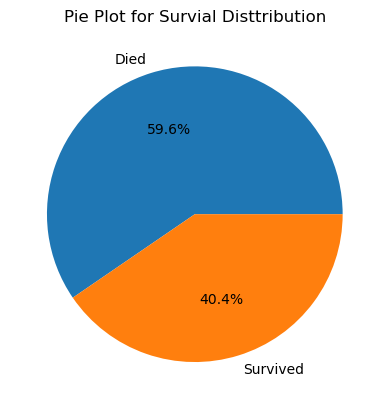

In [13]:
plt.pie(df1['Survived'].value_counts(),labels=["Died","Survived"], autopct='%1.1f%%')
plt.title('Pie Plot for Survial Disttribution')
plt.show()

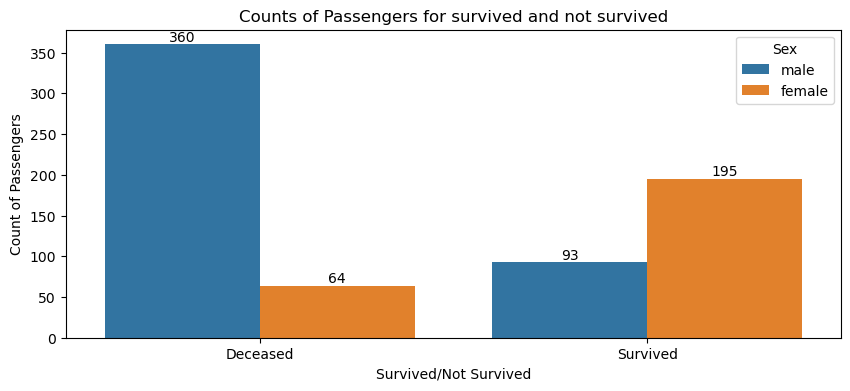

In [14]:
# Create the count plot
plt.figure(figsize=(10, 4))
ax = sns.countplot(data=df1, x='Survived', hue='Sex')

# Add the count values on top of the bars using bar_label
ax.bar_label(ax.containers[0], label_type='edge')
ax.bar_label(ax.containers[1], label_type='edge')


plt.title('Counts of Passengers for survived and not survived')
plt.xlabel('Survived/Not Survived')
plt.ylabel('Count of Passengers')
plt.show()

#### Note: We can see there were more women that survied and man died

In [15]:
# df1[ (df1['Sex']=='female') & (df1['Survived']=='Survived')]/len(df1[df1['Sex']=='female'])
num_female_survived = len(df1[(df1['Sex'] == 'female') & (df1['Survived'] == 'Survived')])
total_females = len(df1[df1['Sex'] == 'female'])
per_fem = round(num_female_survived*100 / total_females, 2)

num_male_survived = len(df1[(df1['Sex'] == 'male') & (df1['Survived'] == 'Survived')])
total_males = len(df1[df1['Sex'] == 'male'])
per_male = round(num_male_survived*100 / total_males, 2)

print('Percentage of female survived ',per_fem)
print('Percentage of male survived ',per_male)

Percentage of female survived  75.29
Percentage of male survived  20.53


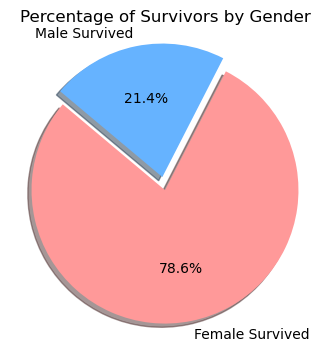

In [16]:
# Data for the pie chart
labels = ['Female Survived', 'Male Survived']
sizes = [per_fem, per_male]
colors = ['#ff9999','#66b3ff']
explode = (0.1, 0)  # explode the first slice

# Create the pie chart
plt.figure(figsize=(4, 4))
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=140)
plt.title('Percentage of Survivors by Gender')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

# Show the plot
plt.show()

In [17]:
df.columns

Index(['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare',
       'Embarked'],
      dtype='object')

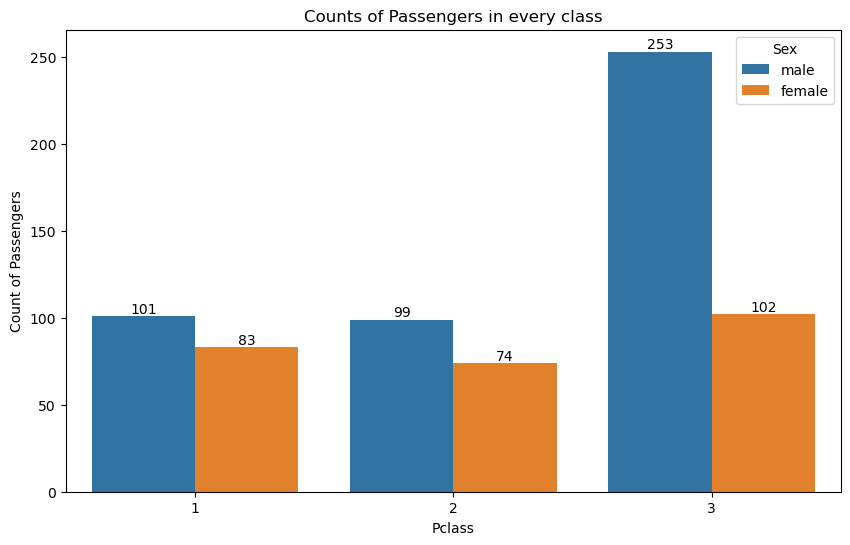

In [19]:
# Create the count plot
plt.figure(figsize=(10, 6))
ax = sns.countplot(data=df, x='Pclass', hue='Sex')

# Add the count values on top of the bars using bar_label
ax.bar_label(ax.containers[0], label_type='edge')
ax.bar_label(ax.containers[1], label_type='edge')

plt.title('Counts of Passengers in every class')
plt.ylabel('Count of Passengers')
plt.show()

In [20]:
df.columns

Index(['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare',
       'Embarked'],
      dtype='object')

### Making a new column named family

#### We will make column Familiy = SibSp(Siblings) + Parch(Parent/child) and remove these two

In [21]:
df1['Family'] = df1['SibSp'] + df1['Parch']
# df1.drop(['SibSp','Parch'], axis = 1, inplace=True)
df1.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Family
0,Deceased,3,male,22.0,1,0,7.2500,S,1
1,Survived,1,female,38.0,1,0,71.2833,C,1
2,Survived,3,female,26.0,0,0,7.9250,S,0
3,Survived,1,female,35.0,1,0,53.1000,S,1
4,Deceased,3,male,35.0,0,0,8.0500,S,0


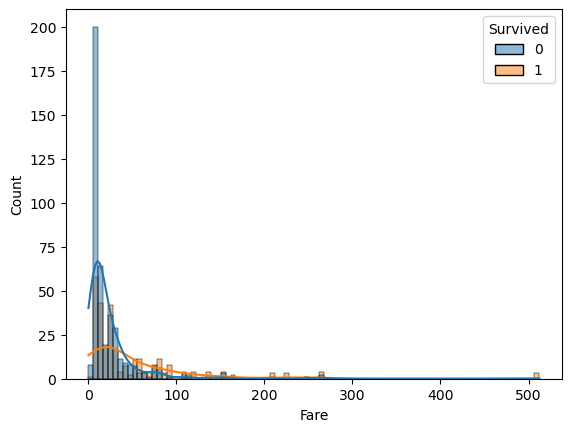

In [22]:
sns.histplot(data=df, x='Fare',kde=True, hue='Survived')
plt.show()

#### Note: Most of the tickets costed less than $100 and survial rate was good for extremely high ticket prices

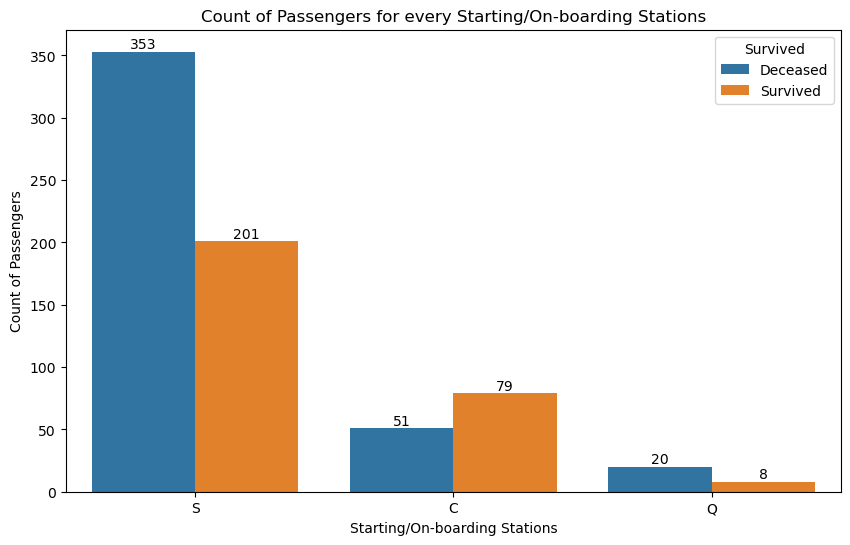

In [23]:
# Create the count plot
plt.figure(figsize=(10, 6))
ax = sns.countplot(data=df1,x='Embarked',hue='Survived')

# Add the count values on top of the bars using bar_label
ax.bar_label(ax.containers[0], label_type='edge')
ax.bar_label(ax.containers[1], label_type='edge')

plt.title('Count of Passengers for every Starting/On-boarding Stations')
plt.ylabel('Count of Passengers')
plt.xlabel('Starting/On-boarding Stations')
plt.show()

#### Note: So the survival rate is high if one onboarded from station C

In [24]:
df1.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Family
0,Deceased,3,male,22.0,1,0,7.2500,S,1
1,Survived,1,female,38.0,1,0,71.2833,C,1
2,Survived,3,female,26.0,0,0,7.9250,S,0
3,Survived,1,female,35.0,1,0,53.1000,S,1
4,Deceased,3,male,35.0,0,0,8.0500,S,0


In [25]:
df1['Family'].min()

0

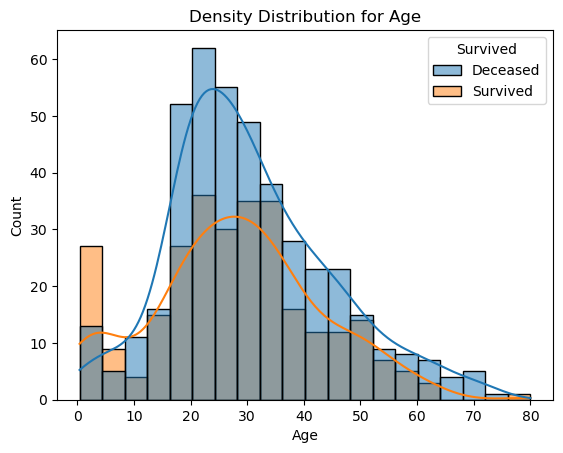

In [26]:
sns.histplot(data=df1,x='Age',kde=True, hue='Survived')
plt.title('Density Distribution for Age')
plt.show()

#### Note: Survival in smaller kids(<10) is high

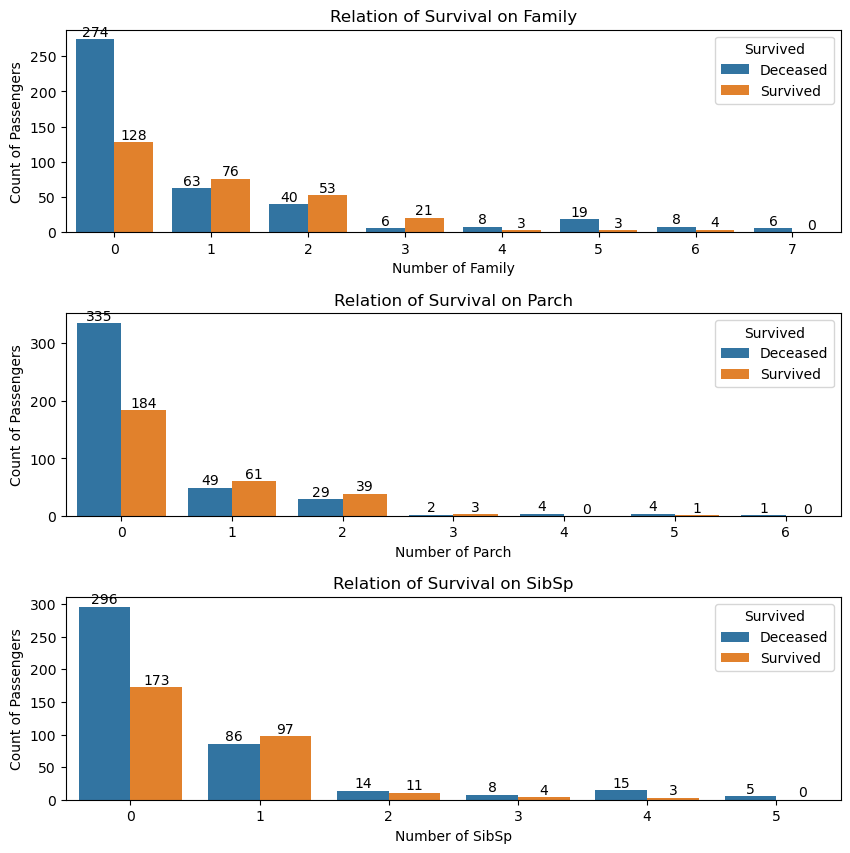

In [40]:
# List of family-related features
fam = ['Family', 'Parch', 'SibSp']

# Create subplots
fig, axes = plt.subplots(ncols=1, nrows=3, figsize=(10, 10))
axes = axes.flatten()

# Loop through each family-related feature and create a countplot
for index, col in enumerate(fam):
    ax = sns.countplot(data=df1, x=col, hue='Survived', ax=axes[index])

    # Add the count values on top of the bars using bar_label
    for container in ax.containers:
        ax.bar_label(container, label_type='edge')
    
    # Set the title and labels
    ax.set_title(f'Relation of Survival on {col}')
    ax.set_ylabel('Count of Passengers')
    ax.set_xlabel(f'Number of {col}')

# Adjust layout to avoid overlap
plt.subplots_adjust(hspace=0.4, wspace=0.4)
plt.show()


#### Note: It is clear that when there are 1,2 or 3 family members(Parent or siblings) the chances of survival are more

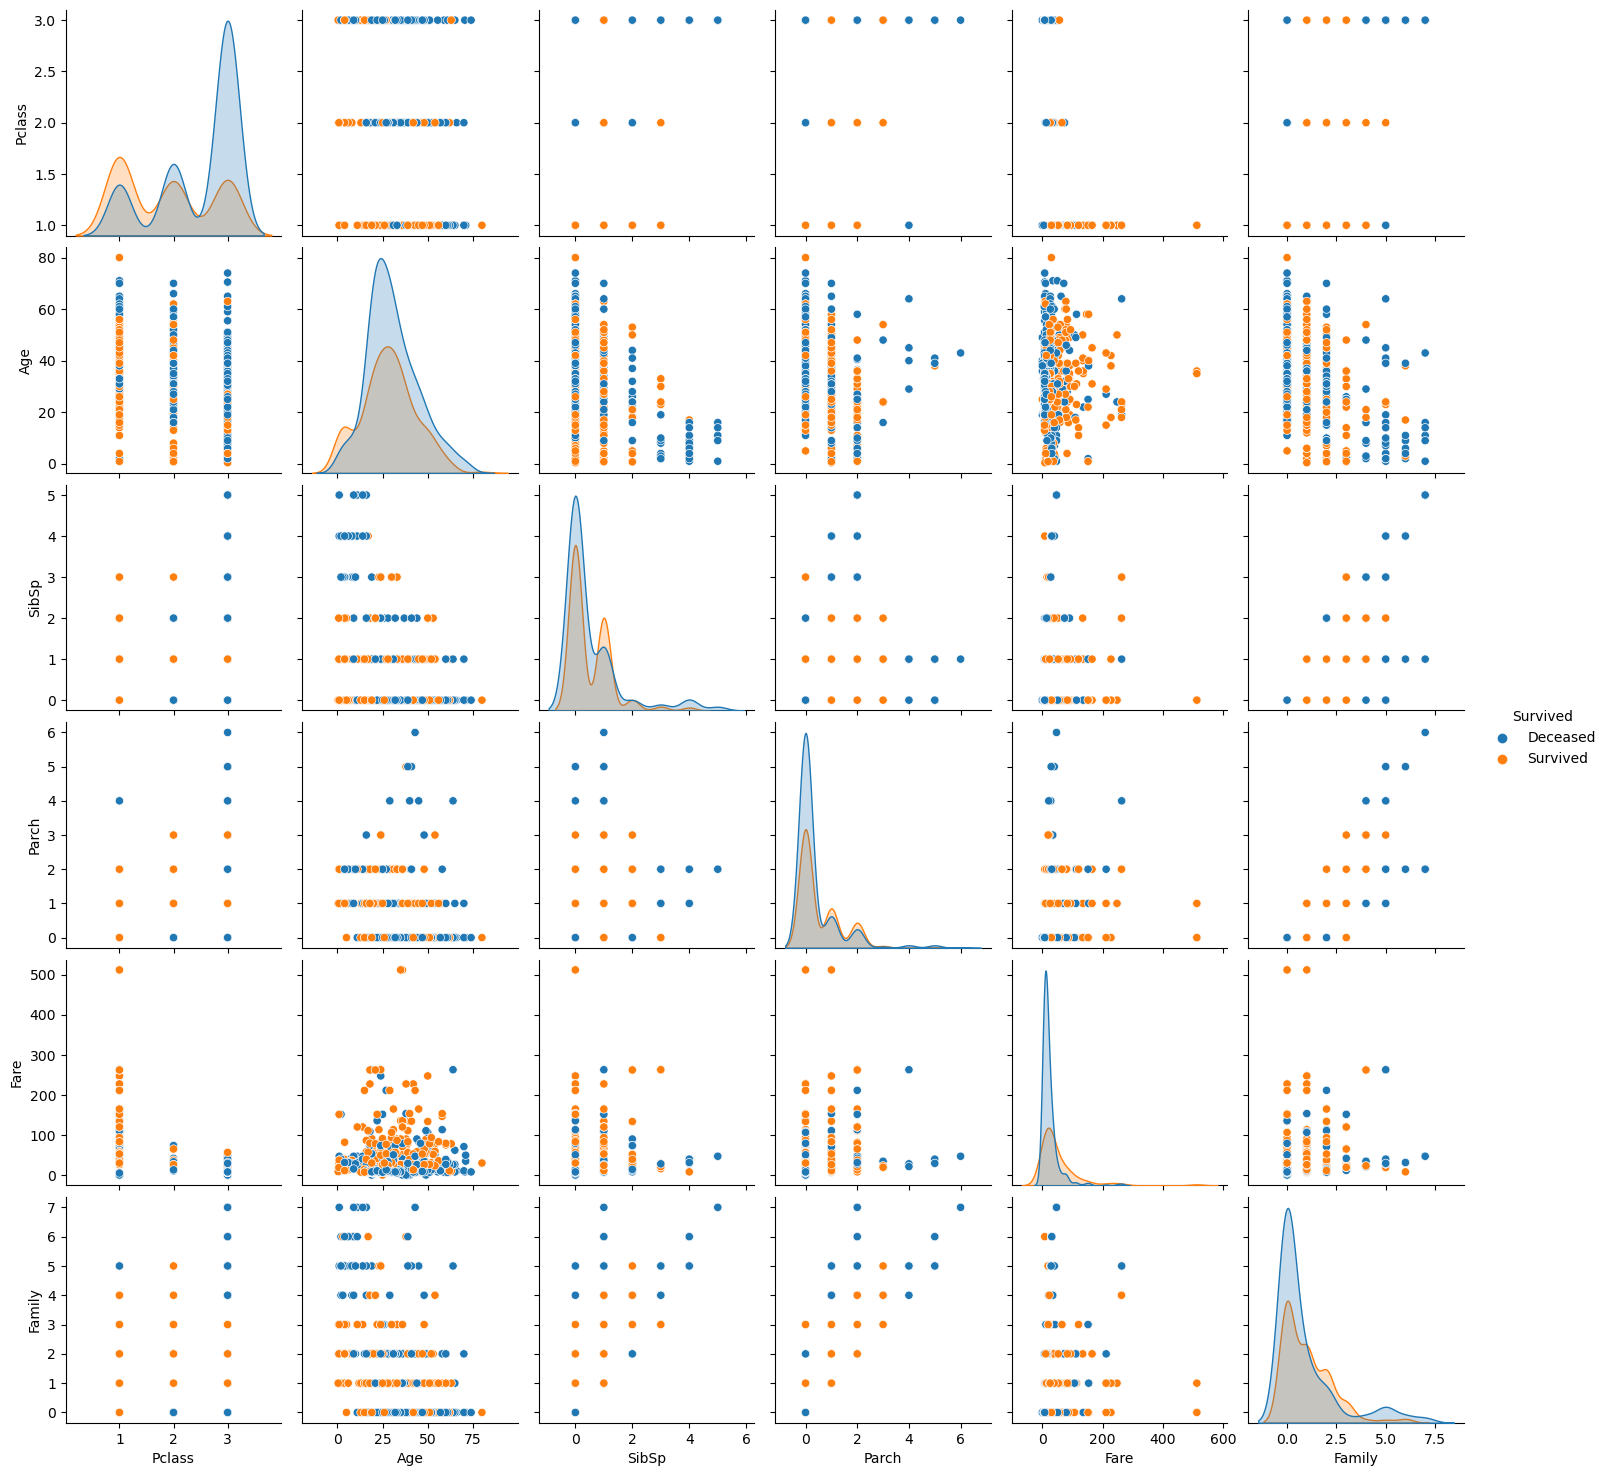

In [41]:
sns.pairplot(df1, hue='Survived')
plt.show()

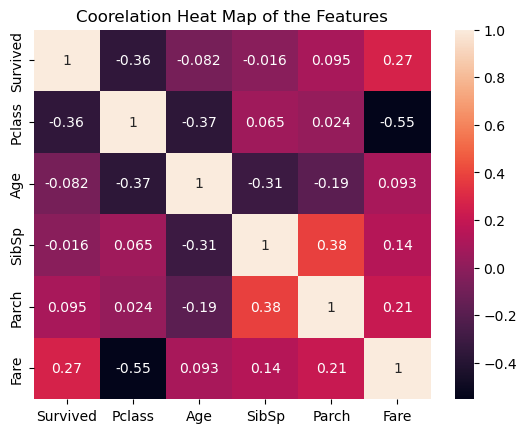

In [28]:
sns.heatmap(df.corr(),annot=True)
plt.title('Coorelation Heat Map of the Features')
plt.show()

#### Note: We can see a slight negative correlation between PClass and Survived and PClasss and Age

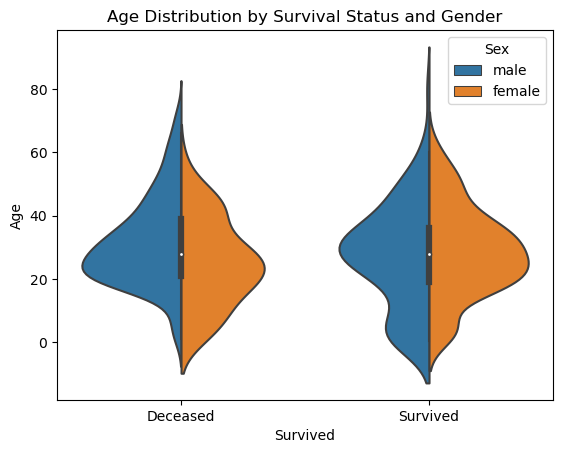

In [45]:
sns.violinplot(data=df1, x='Survived', y='Age', hue='Sex', split=True)
plt.title('Age Distribution by Survival Status and Gender')
plt.show()

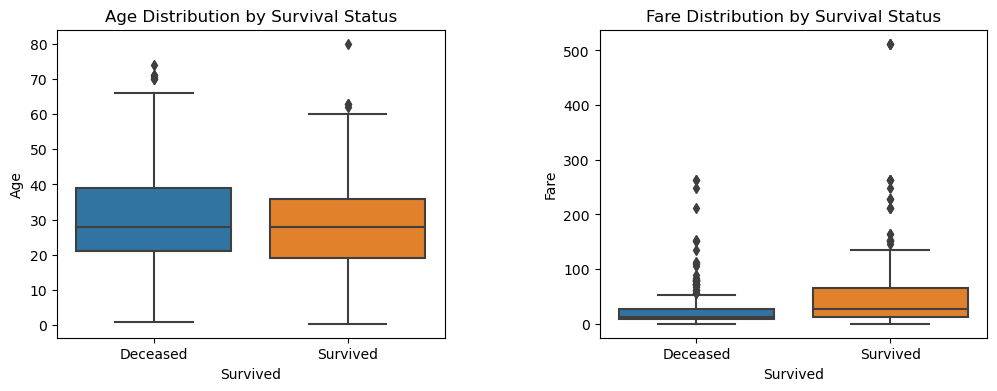

In [54]:
box_plt = ['Age','Fare']

# Create subplots
fig, axes = plt.subplots(ncols=2, nrows=1, figsize=(12, 4))
axes = axes.flatten()

for index, col in enumerate(box_plt):
    ax = sns.boxplot(data=df1, x='Survived', y=col, ax=axes[index])
    ax.set_title(f'{col} Distribution by Survival Status')
#     plt.show()

# Adjust layout to avoid overlap
plt.subplots_adjust(hspace=0.4, wspace=0.4)
plt.show()


#### Note: There are lot of outliers based on Fare and not much in Age

### Statistical Tests

#### Annova Test:- Null hypothesis is that the mean of all the three groups is similar. Alternate is that atleast one differs.

In [55]:
from scipy.stats import f_oneway
anova_result = f_oneway(df[df['Pclass'] == 1]['Age'].dropna(),
                        df[df['Pclass'] == 2]['Age'].dropna(),
                        df[df['Pclass'] == 3]['Age'].dropna())
print('ANOVA test result:', anova_result)

ANOVA test result: F_onewayResult(statistic=56.03144521440215, pvalue=2.556513826740675e-23)


#### Note: As p value is less than 0.05 this means that the mean of atleast one of the three groups is different, and hence we can say that there are different aged people in different groups

#### Chi Square Test:-

#### Null Hypothesis:- That there is no relation/association between two variables and they are independent. Threshold is 0.05. So is p-value < 0.05 we reject the Null hypothesis and say the features are related.

In [61]:
from scipy.stats import chi2_contingency
for i in cat_col:
    chi2, p, dof, ex = chi2_contingency(pd.crosstab(df['Survived'], df[i]))
    print(f'Chi-square test result: for feature {i} :-', chi2, p)
    if p<0.05:
        print(f'As p value is The feature {i} and Survived are dependent')

Chi-square test result: for feature Survived :- 707.8545839984272 5.857155342587371e-156
As p value is The feature Survived and Survived are dependent
Chi-square test result: for feature Pclass :- 91.08074548791019 1.6675060315554636e-20
As p value is The feature Pclass and Survived are dependent
Chi-square test result: for feature Sex :- 202.86944877617123 4.939416685451492e-46
As p value is The feature Sex and Survived are dependent
Chi-square test result: for feature SibSp :- 22.454253153661288 0.00042907488830226415
As p value is The feature SibSp and Survived are dependent
Chi-square test result: for feature Parch :- 28.78494064715035 6.681060065052954e-05
As p value is The feature Parch and Survived are dependent
Chi-square test result: for feature Embarked :- 27.918691003688622 8.660306799267892e-07
As p value is The feature Embarked and Survived are dependent


#### Note: So all we can say that columns 'Pclass', 'Sex', 'SibSp', 'Parch', 'Embarked' are related to 'Survived' according to the Chi-Square test